In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
plt.style.use('bmh')

In [2]:
data = np.genfromtxt('wine.csv', delimiter=',')

y = data[:, 0]
X = data[:, 1:]

In [3]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
Y = Counter(y)
print(Y)

Counter({2.0: 71, 1.0: 59, 3.0: 48})


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = LogisticRegression()

In [6]:
XT, Xt, YT, Yt = train_test_split(X, y, test_size=0.2)

In [7]:
%%timeit
clf.fit(XT, YT)

2.31 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
print('Accuracy On Train Set: ', accuracy_score(YT, clf.predict(XT)))
print('Accuracy On Test Set: ', accuracy_score(Yt, clf.predict(Xt)))

Accuracy On Train Set:  0.9788732394366197
Accuracy On Test Set:  0.9722222222222222


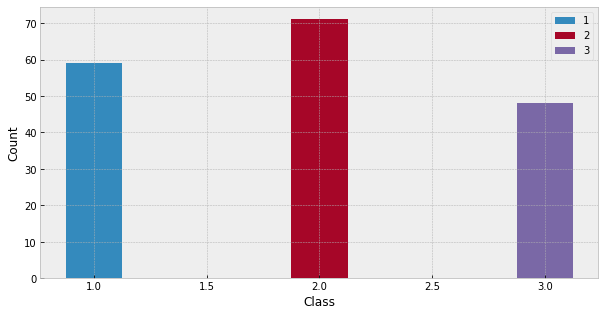

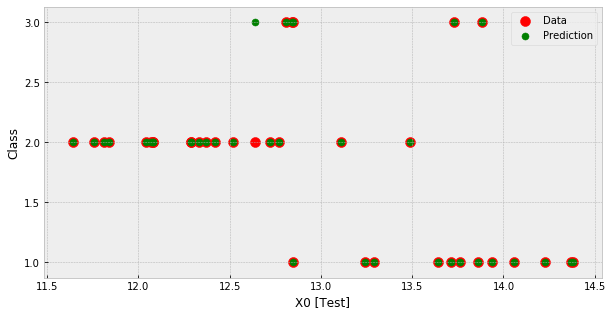

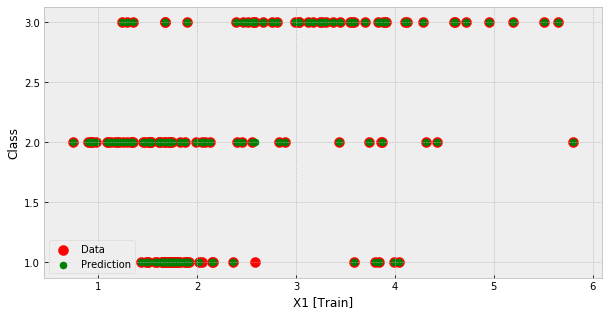

In [9]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.bar(1, Y[1], 0.25)
plt.bar(2, Y[2], 0.25)
plt.bar(3, Y[3], 0.25)
plt.legend(['1', '2', '3'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.scatter(Xt[:, 0], Yt, color='red', s=100)
plt.scatter(Xt[:, 0], clf.predict(Xt), color='green', s=50)
plt.legend(['Data', 'Prediction'])
plt.xlabel('X0 [Test]')
plt.ylabel('Class')
plt.show()

plt.scatter(XT[:, 1], YT, color='red', s=100)
plt.scatter(XT[:, 1], clf.predict(XT), color='green', s=50)
plt.legend(['Data', 'Prediction'])
plt.xlabel('X1 [Train]')
plt.ylabel('Class')
plt.show()